In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np
import seaborn as sns

### Q1.

Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

<function matplotlib.pyplot.show(close=None, block=None)>

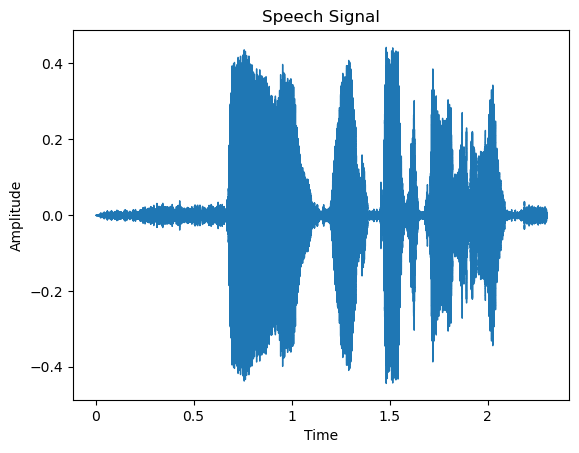

In [3]:
signal_fft, sr = librosa.load('AI_VOICE.wav')
librosa.display.waveshow(signal_fft)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show

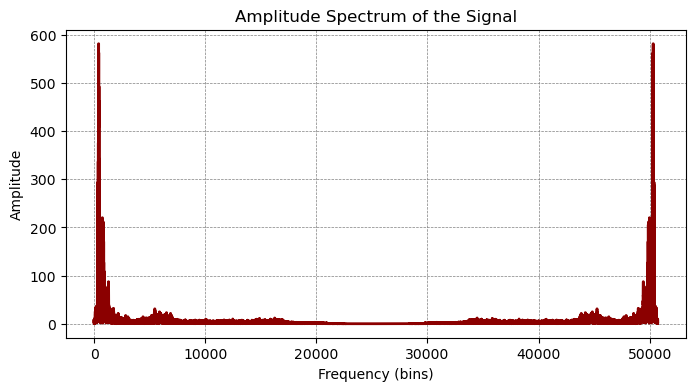

In [4]:
import numpy as np
import matplotlib.pyplot as plt

signal_fft = np.fft.fft(signal_fft)
signal_amplitude = np.abs(signal_fft)

plt.figure(figsize=(8, 4))
plt.plot(signal_amplitude, color='darkred', linestyle='-', linewidth=2)
plt.title('Amplitude Spectrum of the Signal')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Adding grid for clarity
plt.show()


### Q2.

Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amplitude')

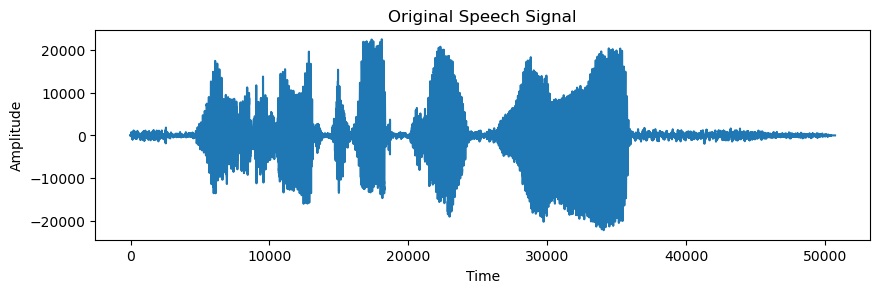

In [5]:
signal_fft = np.fft.fft(signal_fft)
reconstructed_signal = np.fft.ifft(signal_fft)
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(signal_fft, label='Original Signal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

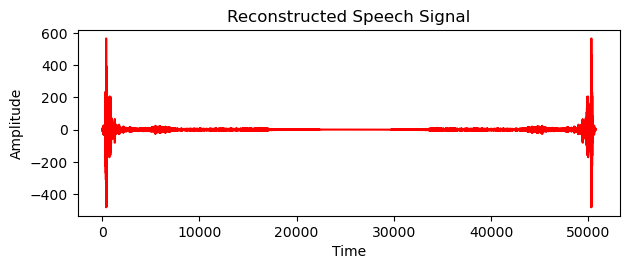

In [6]:
# Reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal', color='red')
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.tight_layout()
plt.show()

### Q3.

Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

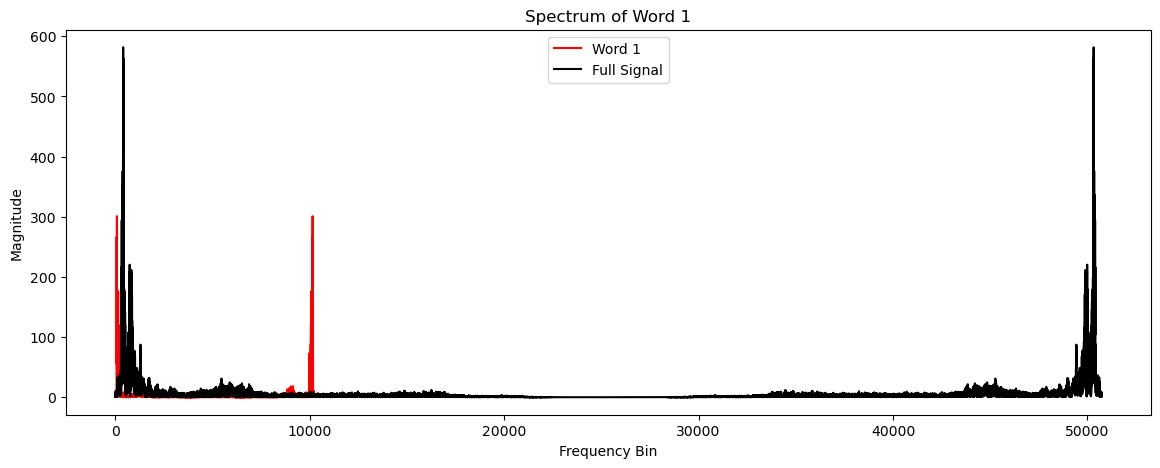

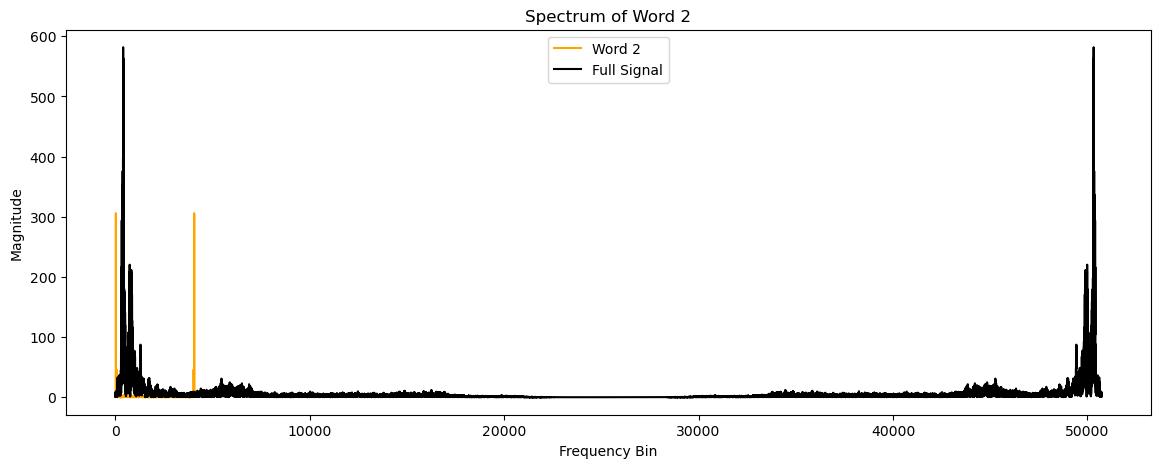

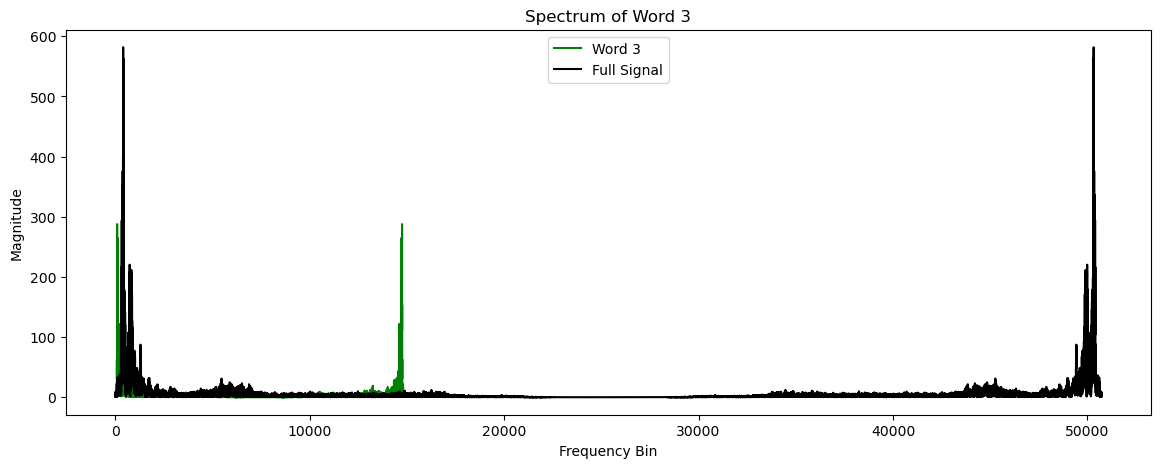

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

audio_path = 'AI_VOICE.wav'
signal, sample_rate = librosa.load(audio_path)

threshold_value = np.percentile(np.abs(signal), 92)
segment_bounds = librosa.effects.split(signal, top_db=-20 * np.log10(threshold_value))
colors = ['red', 'orange', 'green', 'yellow', 'magenta']  

for idx, (start_idx, end_idx) in enumerate(segment_bounds):
    word_signal = signal[start_idx:end_idx]
    
    full_signal_fft = np.fft.fft(signal)
    word_signal_fft = np.fft.fft(word_signal)
    
    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(word_signal_fft), color=colors[idx % len(colors)], label=f'Word {idx+1}')
    plt.plot(np.abs(full_signal_fft), color='black', label='Full Signal')

    plt.title(f'Spectrum of Word {idx+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()


### Q4.

Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

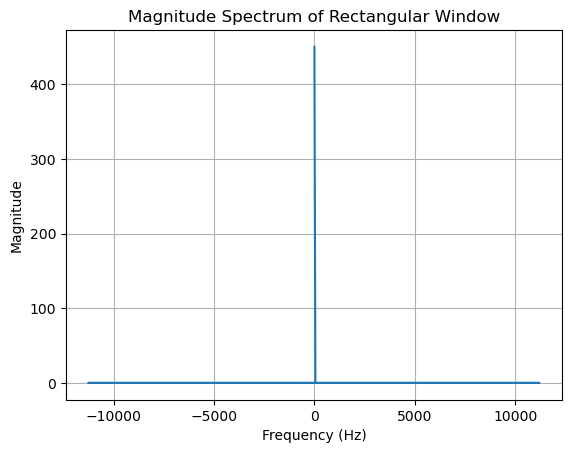

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load your audio file
sampling_rate_audio, audio_signal = wavfile.read('AI_vOICE.wav')

# Define the parameters
sampling_rate = 22500  # Sampling rate in Hz
window_duration = 0.02  # Window duration in seconds

# Generate the rectangular window
window_length = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length)

# Compute the FFT
fft_result = np.fft.fft(rectangular_window)

# Calculate the frequency axis
frequency_axis = np.fft.fftfreq(window_length, 1 / sampling_rate)

# Plot the magnitude spectrum
plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### Q5.

Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.

In [9]:
import librosa
import librosa.display

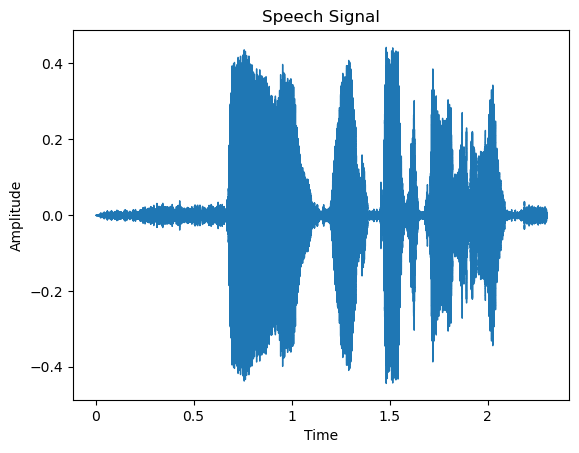

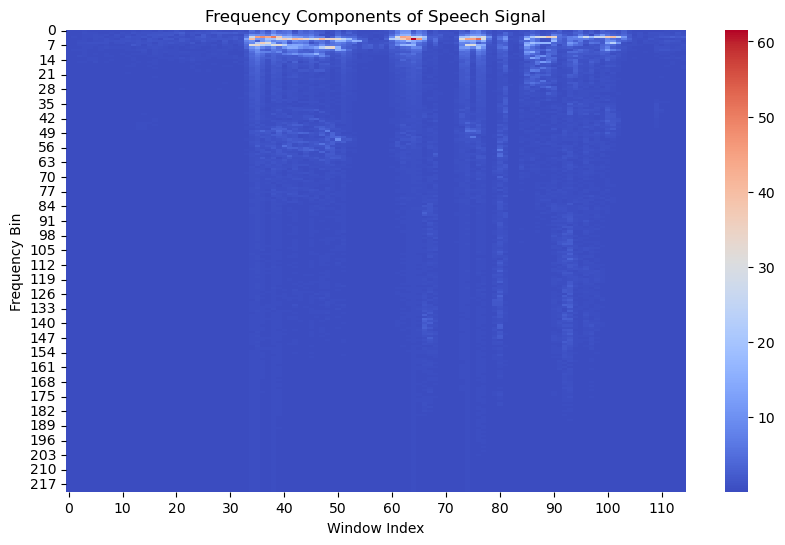

In [10]:
signal_fft, sr = librosa.load('AI_VOICE.wav')
librosa.display.waveshow(signal_fft, sr=sr)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Defining the length of the window in seconds
window_length_in_sec = 0.02
#calculate the length of window in samples
window_length = int(window_length_in_sec * sr)
#calculate the number of the windows
num_windows = len(signal_fft) // window_length

# Initialize a frequency matrix to store FFT results
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))

# Iterate over each window
for i in range(num_windows):
    window = signal_fft[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='coolwarm', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

### Q6.

Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.

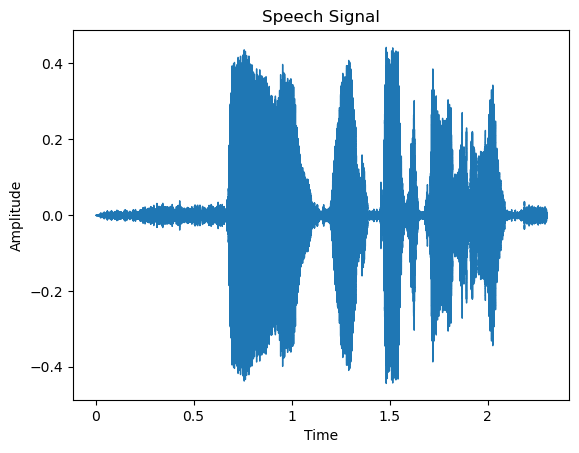

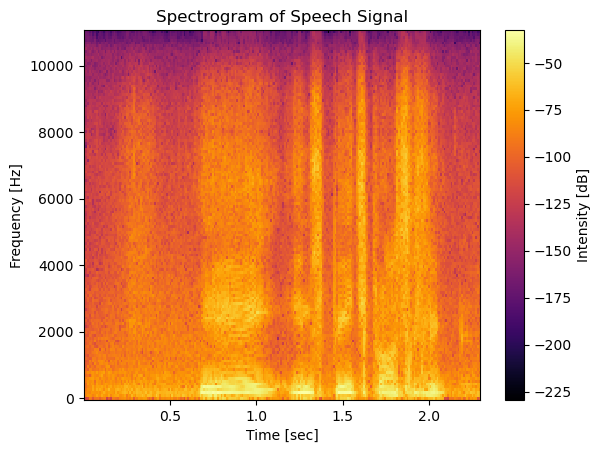

In [11]:
from scipy.signal import spectrogram
librosa.display.waveshow(signal_fft)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(signal_fft, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx),cmap='inferno')  
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()